In [14]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

In [15]:
# Carregar os dados
data = pd.read_csv(r'D:\energy_disclosure_2021_rows.csv')

# Exibir as primeiras linhas
print(data.head())

   10_Digit_BBL  Street_Number     Street_Name  DOF_Gross_Square_Footage  \
0    1007610020            325  WEST 37 STREET                     48843   
1    1007610022            313  WEST 37 STREET                     82354   
2    1007610028            307  WEST 37 STREET                    102824   
3    1007610033            545        8 AVENUE                    166874   
4    1007610037            555        8 AVENUE                    162260   

  Energy_Efficiency_Grade  Energy_Star_1-100_Score  
0                       A                      100  
1                       C                       62  
2                       B                       79  
3                       A                       86  
4                       A                      100  


       10_Digit_BBL  Street_Number  DOF_Gross_Square_Footage  \
count  1.000000e+02     100.000000              1.000000e+02   
mean   1.000952e+09     123.230000              5.103363e+05   
std    2.232645e+06     137.155508              5.303829e+05   
min    1.000050e+09       1.000000              2.548300e+04   
25%    1.000160e+09      25.000000              2.171008e+05   
50%    1.000220e+09      64.000000              3.611830e+05   
75%    1.000290e+09     202.750000              5.844400e+05   
max    1.007620e+09     555.000000              3.678000e+06   

       Energy_Star_1-100_Score  
count               100.000000  
mean                 63.250000  
std                  27.262056  
min                   1.000000  
25%                  43.500000  
50%                  75.500000  
75%                  83.250000  
max                 100.000000  
10_Digit_BBL                0
Street_Number               0
Street_Name                 0
DOF_Gross_Square_Footage    0
Energy

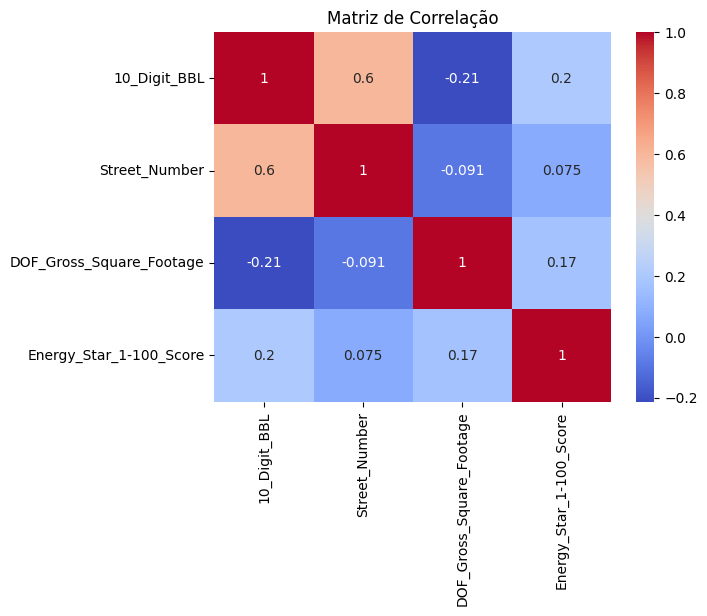

In [16]:
# Resumo estatístico
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())

# Tratamento de valores nulos
data = data.dropna()

# Selecionar apenas colunas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Matriz de correlação
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [22]:
# Selecionar as colunas relevantes
X = data[['DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = data['Energy_Efficiency_Grade']

# Codificar a variável alvo
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Normalizar os recursos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [23]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

Random Forest Accuracy: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         7
           3       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



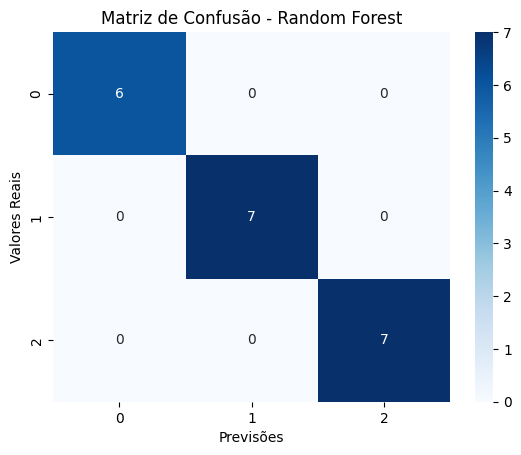

F1-Score: 1.0
Precisão: 1.0
Recall: 1.0


In [19]:
# Avaliar Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Matriz de Confusão para Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()

# Métricas Complementares para o Melhor Modelo (Random Forest)
f1 = f1_score(y_test, rf_pred, average='weighted')
precision = precision_score(y_test, rf_pred, average='weighted')
recall = recall_score(y_test, rf_pred, average='weighted')

print(f"F1-Score: {f1}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")